<style>
    @font-face {
        font-family: "Computer Modern";
        src: url('http://mirrors.ctan.org/fonts/cm-unicode/fonts/otf/cmunss.otf');
    }
    div.cell{
        width:800px;
        margin-left:16% !important;
        margin-right:auto;
    }
    h1 {
        font-family: Helvetica, serif;
    }
    h4{
        margin-top:12px;
        margin-bottom: 3px;
       }
    div.text_cell_render{
        font-family: Computer Modern, "Helvetica Neue", Arial, Helvetica, Geneva, sans-serif;
        line-height: 145%;
        font-size: 130%;
        width:800px;
        margin-left:auto;
        margin-right:auto;
    }
    .CodeMirror{
            font-family: "Source Code Pro", source-code-pro,Consolas, monospace;
    }
    .prompt{
        display: None;
    }
    .text_cell_render h5 {
        font-weight: 300;
        font-size: 22pt;
        color: #4057A1;
        font-style: italic;
        margin-bottom: .5em;
        margin-top: 0.5em;
        display: block;
    }
    
    .warning{
        color: rgb( 240, 20, 20 )
        }  
</style>
<script>
    MathJax.Hub.Config({
                        TeX: {
                           extensions: ["AMSmath.js"]
                           },
                tex2jax: {
                    inlineMath: [ ['$','$'], ["\\(","\\)"] ],
                    displayMath: [ ['$$','$$'], ["\\[","\\]"] ]
                },
                displayAlign: 'center', // Change this to 'center' to center equations.
                "HTML-CSS": {
                    styles: {'.MathJax_Display': {"margin": 4}}
                }
        });
</script>

# Lifelines examples
##### Gehan Survival Dataset

The data show the length of remission in weeks for two groups of leukemia patients, treated and control, and were analyzed by Cox in his original proportional hazards paper. The data are available in a file containing three columns:

- Treatment: coded Treated (drug) or Control (placebo),
- Time: weeks of remission,
- Failure: coded 1 if a failure (relapse), 0 if censored

In [1]:
from lifelines.estimation import KaplanMeierFitter, NelsonAalenFitter
import pandas as pd
import numpy as np
%pylab inline
figsize(12.5,6)

Populating the interactive namespace from numpy and matplotlib


/Users/camerondavidson-pilon/.virtualenvs/data/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['datetime']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [34]:
data = pd.read_csv('../lifelines/datasets/gehan.dat', sep="\s{1,3}", 
                   header=None)
data.columns = ['treatment', 'time', 'failure']

/Users/camerondavidson-pilon/.virtualenvs/data/lib/python2.7/site-packages/ipykernel/__main__.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  from ipykernel import kernelapp as app


In [35]:
data.tail()

,treatment,time,failure
37,1,12,1
38,1,15,1
39,1,17,1
40,1,22,1
41,1,23,1


In [36]:
data = data.dropna()
print data.head()

   treatment  time  failure
0          2     6        1
1          2     6        1
2          2     6        1
3          2     6        0
4          2     7        1


In [37]:
treatment = data['treatment'] == 2

In [38]:
T = data['time']
E = data['failure']
t = np.linspace(0,40,150)

(0, 1.05)

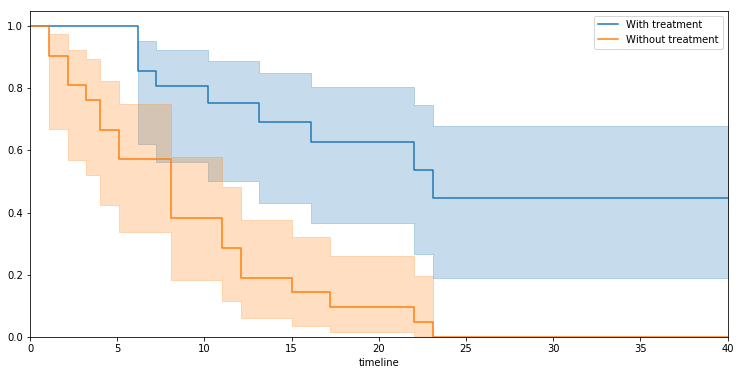

In [39]:
kmf = KaplanMeierFitter()
kmf.fit(T[treatment], timeline=t, event_observed=E[treatment], label='With treatment')
ax = kmf.plot()

kmf.fit(T[~treatment], timeline=t, event_observed=E[~treatment], label="Without treatment")
kmf.plot(ax=ax)
ylim(0,1.05)

### Hazards, too

In [40]:
naf = NelsonAalenFitter()

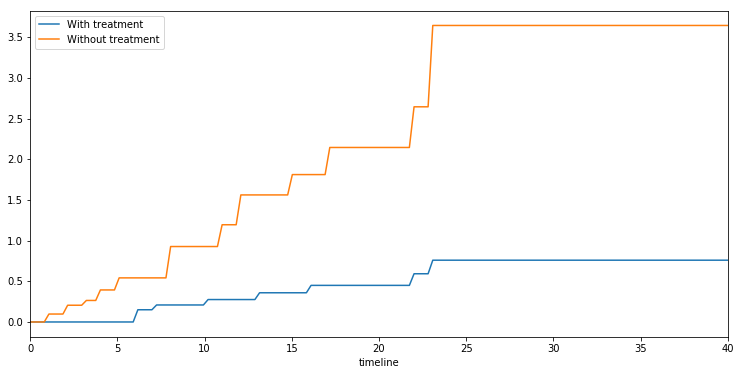

In [41]:
naf.fit(T[treatment],timeline=t, event_observed=E[treatment], label="With treatment")
ax = naf.cumulative_hazard_.plot()
naf.fit(T[~treatment], timeline=t, event_observed=E[~treatment], label="Without treatment")
ax = naf.cumulative_hazard_.plot(ax=ax)

### Try regression models

In [42]:
from lifelines import AalenAdditiveFitter

In [43]:
aaf = AalenAdditiveFitter()
aaf.fit(data, duration_col='time', event_col='failure', timeline=t)

 [-----------------100%-----------------] 30 of 30 complete in 0.0 sec


<lifelines.AalenAdditiveFitter: fitted with 42 observations, 12 censored>

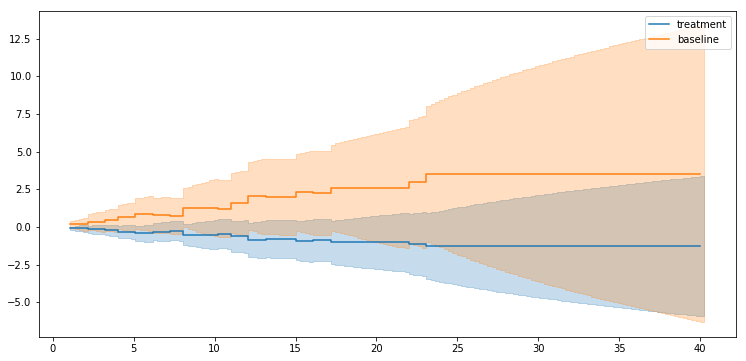

In [49]:
aaf.plot()

In [45]:
from lifelines import CoxPHFitter

In [46]:
cp = CoxPHFitter()
cp.fit(data, duration_col='time', event_col='failure')

<lifelines.CoxPHFitter: fitted with 42 observations, 12 censored>

In [47]:
cp.print_summary()

n=42, number of events=30

             coef  exp(coef)  se(coef)       z      p  lower 0.95  upper 0.95     
treatment -1.5092     0.2211    0.4096 -3.6849 0.0002     -2.3121     -0.7063  ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1 

Concordance = 0.690
